[*********************100%***********************]  1 of 1 completed


Trying SYNE3.SA...



09:27:21 - cmdstanpy - INFO - Chain [1] start processing
09:27:27 - cmdstanpy - INFO - Chain [1] done processing


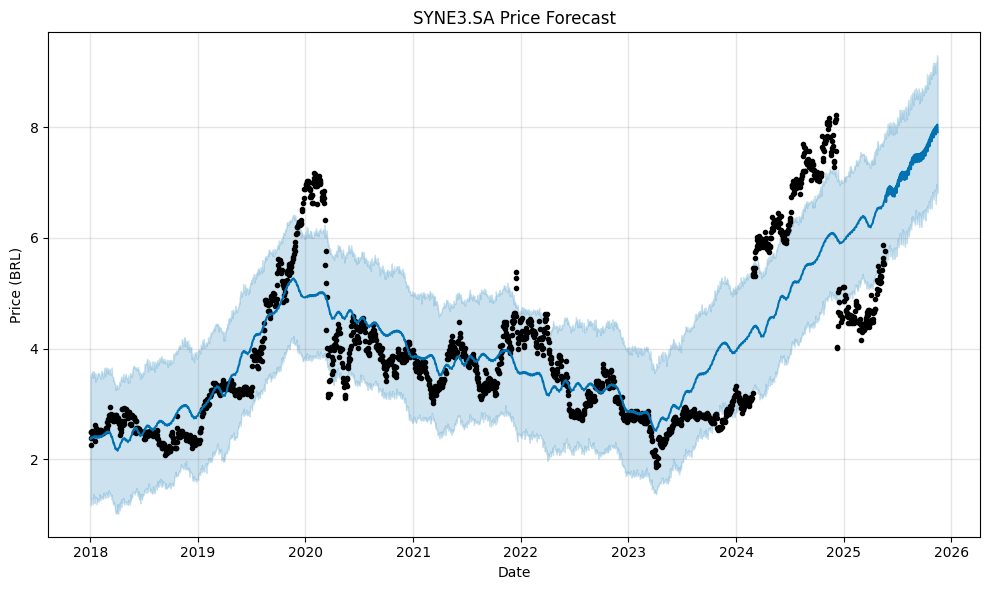

[*********************100%***********************]  1 of 1 completed
09:27:27 - cmdstanpy - INFO - Chain [1] start processing



Trying PLPL3.SA...


09:27:27 - cmdstanpy - INFO - Chain [1] done processing


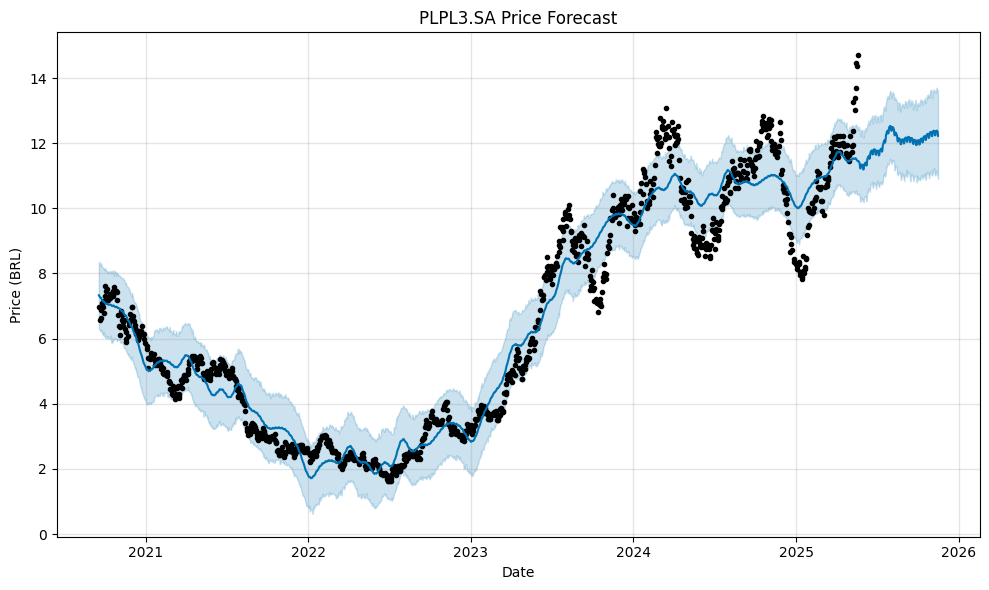

[*********************100%***********************]  1 of 1 completed
09:27:28 - cmdstanpy - INFO - Chain [1] start processing



Trying CMIN3.SA...


09:27:28 - cmdstanpy - INFO - Chain [1] done processing


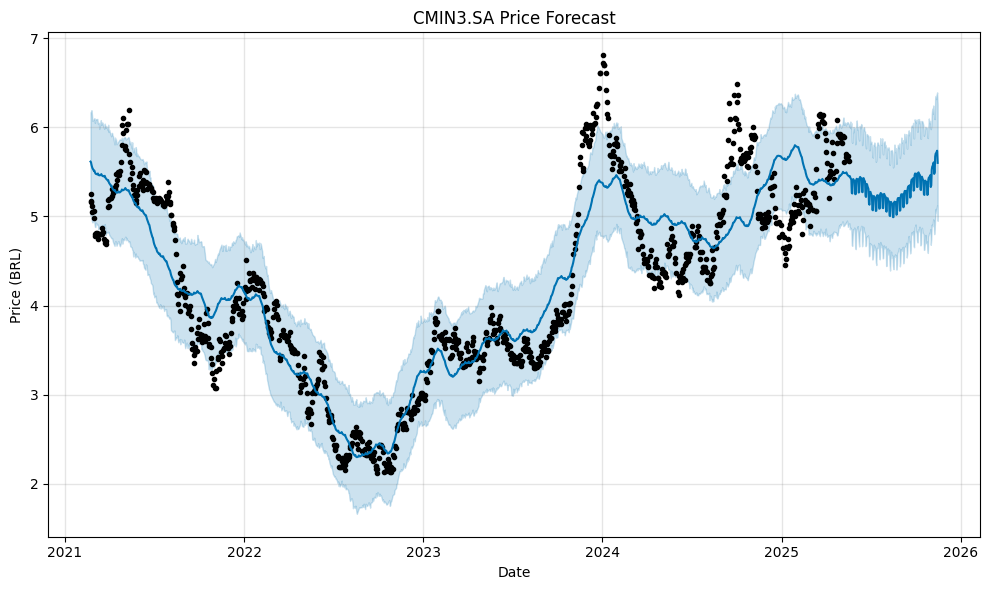

[*********************100%***********************]  1 of 1 completed


Trying SOND6.SA...



09:27:29 - cmdstanpy - INFO - Chain [1] start processing
09:27:30 - cmdstanpy - INFO - Chain [1] done processing


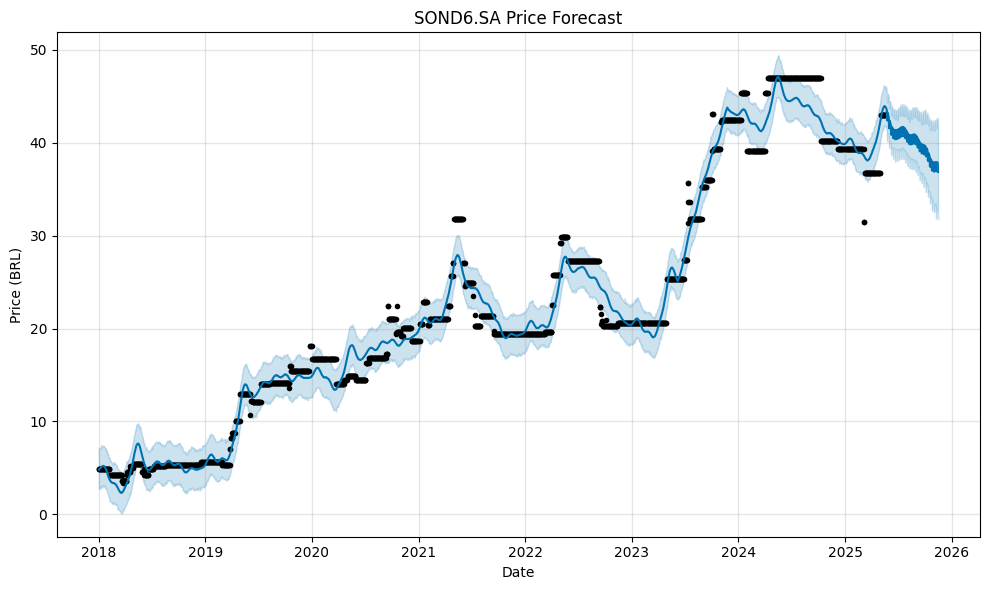

[*********************100%***********************]  1 of 1 completed


Trying WHRL3.SA...



09:27:30 - cmdstanpy - INFO - Chain [1] start processing
09:27:31 - cmdstanpy - INFO - Chain [1] done processing


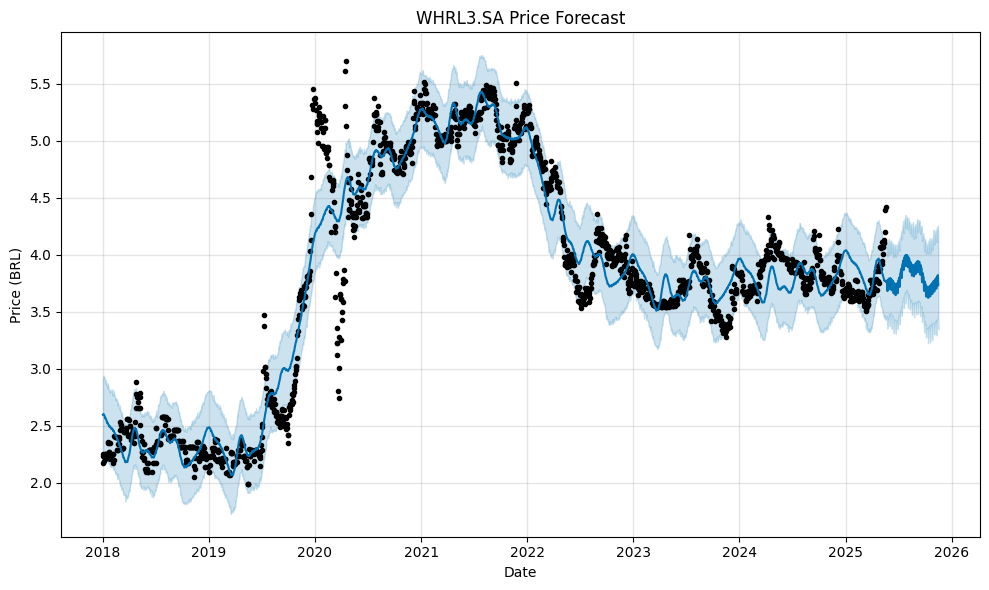

[*********************100%***********************]  1 of 1 completed


Trying DIRR3.SA...



09:27:32 - cmdstanpy - INFO - Chain [1] start processing
09:27:32 - cmdstanpy - INFO - Chain [1] done processing


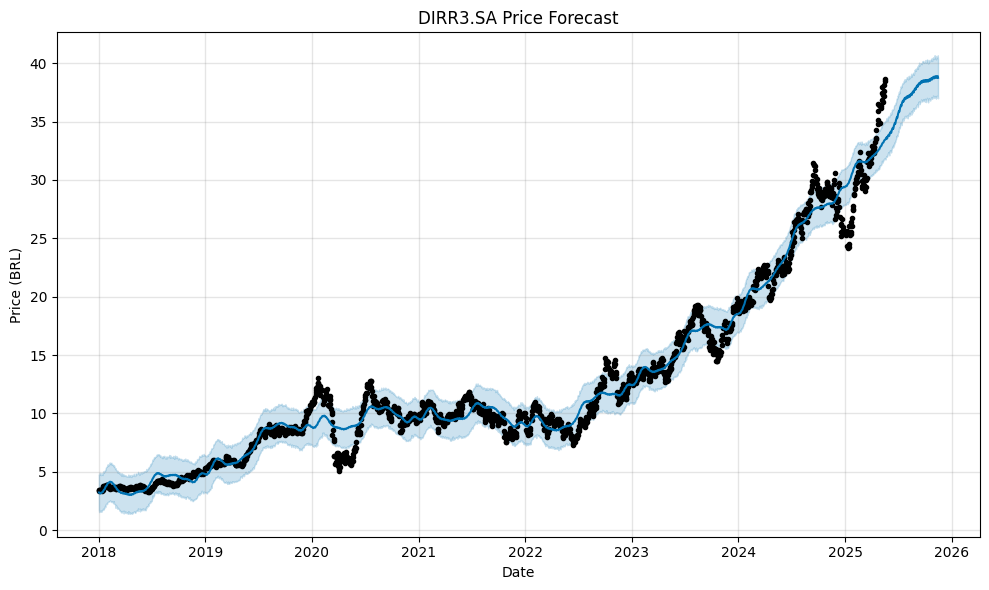

In [7]:
# 04_price_forecast_prophet.ipynb
# Author: André Lopes Marinho
# Description:
# Forecast future prices using Prophet for all filtered stocks with valid Yahoo Finance data.

import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Define tickers (from filtered fundamental results)
tickers = ['SYNE3.SA', 'PLPL3.SA', 'CMIN3.SA', 'SOND6.SA', 'WHRL3.SA', 'DIRR3.SA']

# Step 2: Forecast for each valid ticker
for ticker in tickers:
    print(f"\nTrying {ticker}...")
    try:
        raw = yf.download(ticker, start='2018-01-01', end=datetime.today().strftime('%Y-%m-%d'))

        # For MultiIndex: extract the right level
        if isinstance(raw.columns, pd.MultiIndex) and 'Close' in raw.columns.levels[0]:
            df = raw.xs('Close', axis=1, level=0).dropna().reset_index()
            if ticker not in df.columns:
                print(f"Ticker {ticker} not found in Close-level data.")
                continue
            df = df[['Date', ticker]]
            df.columns = ['ds', 'y']
        else:
            print(f"Data format not supported for {ticker}. Skipping.")
            continue

        if df.shape[0] < 2:
            print(f"Not enough data for {ticker}, skipping.")
            continue

        model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
        model.fit(df)

        future = model.make_future_dataframe(periods=180)
        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f'{ticker} Price Forecast')
        plt.xlabel('Date')
        plt.ylabel('Price (BRL)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f'../data/forecast_{ticker}.csv', index=False)

    except Exception as e:
        print(f"Error for {ticker}: {e}")


